## Problem Statement 1
### Perform an exploratory data analysis of your data to check if there is any global warming ?

In [174]:
import pandas as pd   ## for data manipulaton
import numpy as np     ## for visualization of data
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [175]:
global_temp= pd.read_csv('C:\\Users\\devesh\\Desktop\\Git Repositories\\Predicting-the-temperatures\\Dataset\\GlobalTemperatures.csv')

In [176]:
global_temp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [177]:
## how we will fetch year from the given data
global_temp['dt'][0].split('-')[0]

'1750'

In [178]:
def fetch_year(date):
    return date.split('-')[0]

In [179]:
global_temp['years']=global_temp['dt'].apply(fetch_year)

In [180]:
global_temp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty years  
0                                        NaN  1750  
1                                        NaN  1750  
2                                        NaN  1750  
3                                        NaN  1750  
4                                        NaN  1750

In [181]:
data= global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [182]:
data

years  LandAverageTemperature  LandAverageTemperatureUncertainty
0    1750                8.719364                           2.637818
1    1751                7.976143                           2.781143
2    1752                5.779833                           2.977000
3    1753                8.388083                           3.176000
4    1754                8.469333                           3.494250
..    ...                     ...                                ...
261  2011                9.516000                           0.082000
262  2012                9.507333                           0.083417
263  2013                9.606500                           0.097667
264  2014                9.570667                           0.090167
265  2015                9.831000                           0.092167

[266 rows x 3 columns]

In [183]:
data['Uncertainity_top']= data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainity_bottom']= data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [184]:
data.head()

years  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750                8.719364                           2.637818   
1  1751                7.976143                           2.781143   
2  1752                5.779833                           2.977000   
3  1753                8.388083                           3.176000   
4  1754                8.469333                           3.494250   

   Uncertainity_top  Uncertainity_bottom  
0         11.357182             6.081545  
1         10.757286             5.195000  
2          8.756833             2.802833  
3         11.564083             5.212083  
4         11.963583             4.975083

In [185]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainity_top', 'Uncertainity_bottom'],
      dtype='object')

In [186]:
figure= px.line(data,x='years',y=['LandAverageTemperature',
       'Uncertainity_top', 'Uncertainity_bottom'],title='Average Land Temperature in World')
figure.show()

## Problem Statement 2
### Explore Average temperature in each season.

In [187]:
global_temp.dtypes      #datatypes of the columns

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
dtype: object

In [188]:
##changing the datatype of column 'dt' in the given dataframe
global_temp['dt']=pd.to_datetime(global_temp['dt']) 

In [189]:
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
years                                                object
dtype: object

In [190]:
global_temp['month']= global_temp['dt'].dt.month

In [191]:
global_temp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0 1750-01-01                   3.034                              3.574   
1 1750-02-01                   3.083                              3.702   
2 1750-03-01                   5.626                              3.076   
3 1750-04-01                   8.490                              2.451   
4 1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty years  month  
0                                        NaN  1750      1  
1                                        NaN  1750      2  
2                                        NaN  1750      3  
3                                        NaN  1750      4  
4                                        NaN  1750      5

In [192]:
def get_season(month):
    if month>=3 and month<=4:
        return 'spring'
    elif month>=5 and month<=9:
        return 'summer'
    elif month>=10 and month<=11:
        return 'autumn'
    else:
        return 'winter'

In [193]:
global_temp['season']= global_temp['month'].apply(get_season)

In [194]:
global_temp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0 1750-01-01                   3.034                              3.574   
1 1750-02-01                   3.083                              3.702   
2 1750-03-01                   5.626                              3.076   
3 1750-04-01                   8.490                              2.451   
4 1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty years  month  season  
0                                        NaN  1750      1  winter  
1                                        NaN  1750      2  winter  
2                                        NaN  1750      3  spring  
3                                        NaN  1750      4  spring  
4                                        NaN  1750      5  summer

In [195]:
## fetching the unique value in a certain column

years= global_temp['years'].unique()

In [196]:
years

array(['1750', '1751', '1752', '1753', '1754', '1755', '1756', '1757',
       '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765',
       '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773',
       '1774', '1775', '1776', '1777', '1778', '1779', '1780', '1781',
       '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789',
       '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797',
       '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813',
       '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821',
       '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829',
       '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837',
       '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845',
       '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861',
      

In [197]:
spring_temp=[]
summer_temp=[]
autumn_temp=[]
winter_temp=[]

In [198]:
for year in years:
    current_df=global_temp[global_temp['years']==year]
    spring_temp.append(current_df[current_df['season']=='spring']['LandAverageTemperature'].mean())
    summer_temp.append(current_df[current_df['season']=='summer']['LandAverageTemperature'].mean())
    autumn_temp.append(current_df[current_df['season']=='autumn']['LandAverageTemperature'].mean())
    winter_temp.append(current_df[current_df['season']=='winter']['LandAverageTemperature'].mean())

In [199]:
season = pd.DataFrame()

In [200]:
season['year']=years
season['spring_temps']= spring_temp
season['summer_temp']= summer_temp
season['autumn_temp']= autumn_temp
season['winter_temp']= winter_temp

In [201]:
season.head()

year  spring_temps  summer_temp  autumn_temp  winter_temp
0  1750        7.0580    13.308200       6.3670     2.963000
1  1751        6.7350    12.968333          NaN     1.729000
2  1752        7.0355          NaN       7.5870     2.717000
3  1753        6.8480    13.866600       7.1575     1.104333
4  1754        7.6435    13.138000       7.8715     1.637333

In [202]:
season.columns

Index(['year', 'spring_temps', 'summer_temp', 'autumn_temp', 'winter_temp'], dtype='object')

In [203]:
fig= px.line(season, x='year', y=['spring_temps', 'summer_temp', 'autumn_temp', 'winter_temp'], title='Average Temperature in each Season')
fig.show()

## Problem Statement 3
### Perform Pre-Processing on your data and make it ready for Time Series Analysis

In [204]:
cities= pd.read_csv("C:\\Users\\devesh\\Desktop\\Git Repositories\\Predicting-the-temperatures\\Dataset\\GlobalLandTemperaturesByCity.csv")

In [205]:
cities.tail()

dt  AverageTemperature  AverageTemperatureUncertainty  \
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
8599207  Zwolle  Netherlands   52.24N     5.26E  
8599208  Zwolle  Netherlands   52.24N     5.26E  
8599209  Zwolle  Netherlands   52.24N     5.26E  
8599210  Zwolle  Netherlands   52.24N     5.26E  
8599211  Zwolle  Netherlands   52.24N     5.26E

In [206]:
cities.shape

(8599212, 7)

In [207]:
usa= cities[cities['Country']=='United States']

In [208]:
usa.shape

(687289, 7)

In [209]:
df= ['New York','Los Angeles','San Francisco']

In [210]:
df2= usa[usa['City'].isin(df)]

In [211]:
df2.head()

dt  AverageTemperature  AverageTemperatureUncertainty  \
4356748  1849-01-01               8.819                          2.558   
4356749  1849-02-01               9.577                          1.970   
4356750  1849-03-01              11.814                          2.173   
4356751  1849-04-01              13.704                          2.902   
4356752  1849-05-01              14.834                          2.017   

                City        Country Latitude Longitude  
4356748  Los Angeles  United States   34.56N   118.70W  
4356749  Los Angeles  United States   34.56N   118.70W  
4356750  Los Angeles  United States   34.56N   118.70W  
4356751  Los Angeles  United States   34.56N   118.70W  
4356752  Los Angeles  United States   34.56N   118.70W

In [212]:
df2= df2[['dt','AverageTemperature']]

In [213]:
df2.head()

dt  AverageTemperature
4356748  1849-01-01               8.819
4356749  1849-02-01               9.577
4356750  1849-03-01              11.814
4356751  1849-04-01              13.704
4356752  1849-05-01              14.834

In [214]:
#updating column name

In [215]:
df2.columns=['Date','AvgTemp']

In [216]:
df2.head()

Date  AvgTemp
4356748  1849-01-01    8.819
4356749  1849-02-01    9.577
4356750  1849-03-01   11.814
4356751  1849-04-01   13.704
4356752  1849-05-01   14.834

In [217]:
df2.dtypes

Date        object
AvgTemp    float64
dtype: object

In [218]:
df2['Date']=pd.to_datetime(df2['Date'])

In [219]:
df2.head()

Date  AvgTemp
4356748 1849-01-01    8.819
4356749 1849-02-01    9.577
4356750 1849-03-01   11.814
4356751 1849-04-01   13.704
4356752 1849-05-01   14.834

In [220]:
df2.isna().sum()     ## will calculate the missing values in this 

Date         0
AvgTemp    120
dtype: int64

In [221]:
df2.dropna(inplace=True)

In [222]:
df2.shape

(7073, 2)

In [223]:
df2.set_index('Date',inplace=True)

In [224]:
df2.head()

AvgTemp
Date               
1849-01-01    8.819
1849-02-01    9.577
1849-03-01   11.814
1849-04-01   13.704
1849-05-01   14.834

## Problem Statement 4
###  How to check whether data is stationary or not ?
wrt to Time Series use case, it is must that our data follows a stationary nature.
If our mean and standard deviation of our data gives a pattern which is constant throughout our data then the data is said to be stationary.

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Date', ylabel='AvgTemp'>

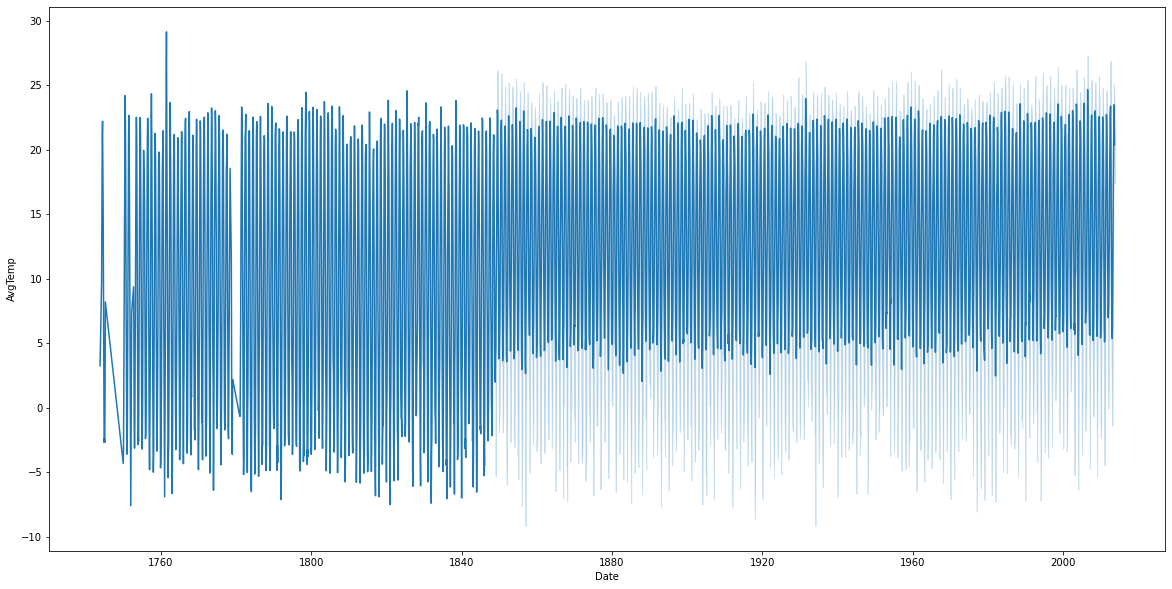

In [226]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df2.index, y=df2['AvgTemp'])

In [227]:
from statsmodels.tsa.stattools import adfuller

In [228]:
adfuller(df2['AvgTemp'])

(-2.006389303675802,
 0.2837786583333232,
 35,
 7037,
 {'1%': -3.431279613044704,
  '5%': -2.8619508146206374,
  '10%': -2.5669886726127307},
 28011.222669408722)

In [229]:
## we will write a function to fetch individual
## values returned by ADFULLER function

In [230]:
def Adfuller_Test(AvgTemp):
    result= adfuller(AvgTemp)
    labels= ['ADF Test stats','p-value','#lags used','no. of observations used']
    
    for value,label in zip(result,labels):
        print('{} : {}'.format(label,value))
        
    if result[1]<0.05:
        print('Strong Evidence against the null hypothesis, hence we will reject the hypothesis, data is -----STATIONARY-----')
    else :
        print('Weak Evidence against the null hypothesis, hence we fail will reject the hypothesis, data is -----NOT STATIONARY-----')

In [231]:
Adfuller_Test(df2['AvgTemp'])

ADF Test stats : -2.006389303675802
p-value : 0.2837786583333232
#lags used : 35
no. of observations used : 7037
Weak Evidence against the null hypothesis, hence we fail will reject the hypothesis, data is -----NOT STATIONARY-----


## Problem Statement 5
### How to make your Data Stationary ?


In [232]:
## making a copy of df2 so that the data isnt lost upon manipulations

In [233]:
DF= df2.copy()

In [234]:
DF.head()

AvgTemp
Date               
1849-01-01    8.819
1849-02-01    9.577
1849-03-01   11.814
1849-04-01   13.704
1849-05-01   14.834

In [235]:
DF['first_diff_temp']= DF['AvgTemp']-DF['AvgTemp'].shift(12)

In [133]:
DF.head()

AvgTemp  first_diff_temp
Date                                
1849-01-01    8.819              NaN
1849-02-01    9.577              NaN
1849-03-01   11.814              NaN
1849-04-01   13.704              NaN
1849-05-01   14.834              NaN

In [134]:
Adfuller_Test(DF['first_diff_temp'].dropna())

ADF Test stats : -21.23965040491092
p-value : 0.0
#lags used : 35
no. of observations used : 7025
Strong Evidence against the null hypothesis, hence we will reject the hypothesis, data is -----STATIONARY-----


In [135]:
## task is completed

<AxesSubplot:xlabel='Date'>

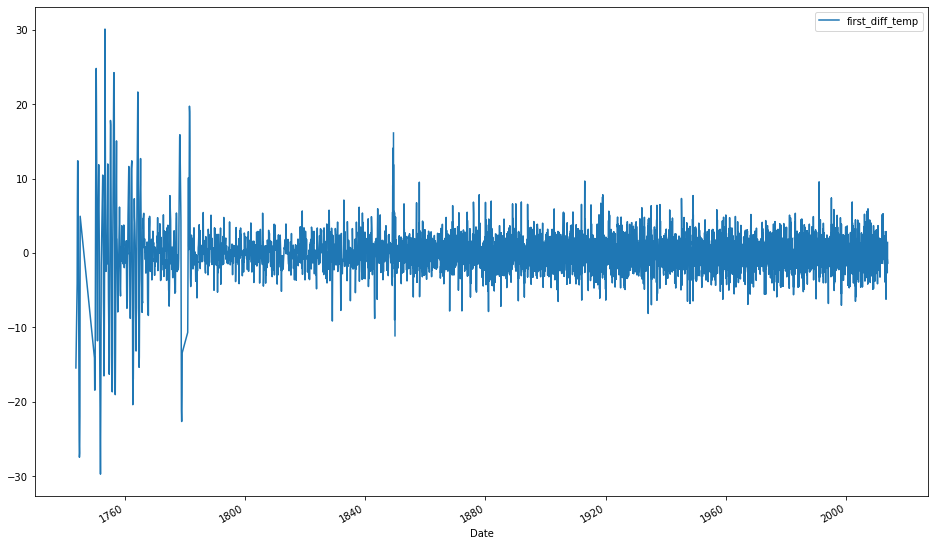

In [141]:
DF[['first_diff_temp']].plot(figsize=(16,10))

## Problem Statement 6
### Examine seasonality in a Data


In [143]:
df2['month']=df2.index.month

In [144]:
df2['year']= df2.index.year

In [145]:
df2.head()

AvgTemp  month  year
Date                            
1849-01-01    8.819      1  1849
1849-02-01    9.577      2  1849
1849-03-01   11.814      3  1849
1849-04-01   13.704      4  1849
1849-05-01   14.834      5  1849

In [146]:
pivot= df2.pivot_table(values='AvgTemp',index='month',columns='year')

In [147]:
pivot

year    1743    1744   1745    1750    1751   1752    1753    1754    1755  \
month                                                                        
1        NaN     NaN -2.363  -4.310  -3.591 -7.588  -3.122  -2.252  -3.193   
2        NaN     NaN -2.671  -2.719  -2.051    NaN  -1.467  -2.583  -1.802   
3        NaN     NaN  1.363   2.773   3.256  3.322   4.207   2.728   1.112   
4        NaN   9.788  8.209   8.848   7.992  7.402   8.099     NaN   8.714   
5        NaN  15.708    NaN  15.411     NaN    NaN  15.330     NaN  15.238   
6        NaN  21.210    NaN  19.017  20.724    NaN  20.820  20.075  19.964   
7        NaN  22.207    NaN  24.203  22.668    NaN  22.524  22.503     NaN   
8        NaN     NaN    NaN  22.135  21.547    NaN  21.324  21.461     NaN   
9        NaN  14.922    NaN  17.445  15.812    NaN  15.548  16.281  16.137   
10       NaN   8.968    NaN   9.076     NaN  9.391  10.479  11.477   8.669   
11     3.264   3.161    NaN     NaN     NaN  5.831   3.363     NaN   3.599   
12       NaN  -2.681    NaN  -1.093     NaN -1.471  -2.854  -0.752  -2.381   

year     1756  ...       2004       2005       2006       2007       2008  \
month          ...                                                          
1      -1.985  ...   4.080333   4.923000   7.135333   5.656000   5.216333   
2       0.259  ...   6.100000   7.297000   7.547667   5.634000   6.754333   
3         NaN  ...  12.184000   9.124667   7.527333  10.586000   9.733667   
4         NaN  ...  13.806333  12.546000  12.051667  12.342000  13.113000   
5         NaN  ...  17.817333  15.982333  17.123333  17.150000  15.800333   
6      20.488  ...  19.872000  19.775333  21.395333  20.514333  21.474667   
7      22.452  ...  22.246333  23.611667  24.655333  22.628333  23.020000   
8      21.208  ...  22.101333  23.028333  21.920333  22.690000  22.305333   
9      17.345  ...  20.669333  19.427667  19.365333  19.559000  20.686667   
10      9.662  ...  14.205667  15.098000  14.368667  15.985667  15.699000   
11      2.894  ...   9.758333  11.739667  11.861333  10.836333  11.423000   
12     -2.900  ...   6.428000   6.582667   7.701667   5.474333   5.610667   

year        2009       2010       2011       2012       2013  
month                                                         
1       5.550333   5.776667   5.109333   7.177667   5.388333  
2       6.540667   6.788000   5.777333   7.970000   6.222667  
3       9.211000  10.486667   9.115000  10.604333  10.162333  
4      12.744000  12.254000  12.710000  13.075000  13.880000  
5      17.565667  15.856333  15.724000  17.670333  17.335333  
6      18.941667  20.436667  19.305000  19.904333  21.028333  
7      22.247667  22.538667  22.733333  22.654000  23.489667  
8      22.578000  21.665333  22.028667  23.384667  21.654667  
9      20.752667  20.537333  20.856333  20.655667  20.393333  
10     14.313333  15.170333  15.846667  16.147667        NaN  
11     11.484000  10.032333  10.378000  10.457667        NaN  
12      5.425333   6.119667   6.991000   6.749333        NaN  

[12 rows x 266 columns]

Text(0, 0.5, 'Temperatures')

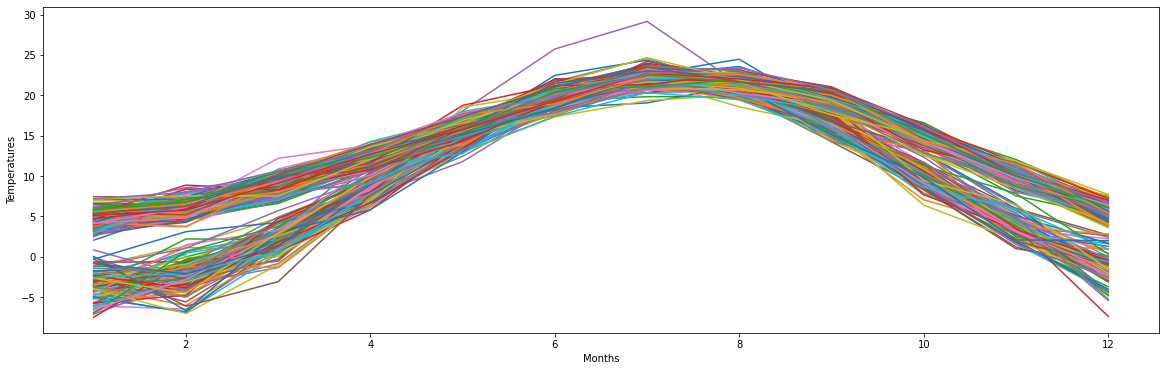

In [150]:
pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperatures')

In [151]:
## to make the graph cleaner

In [152]:
monthly_seasonality= pivot.mean(axis=1)

<AxesSubplot:xlabel='month'>

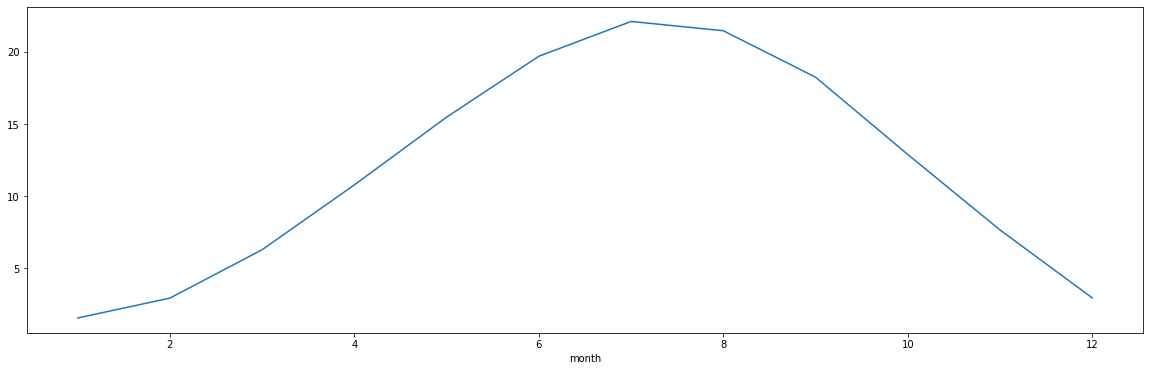

In [154]:
monthly_seasonality.plot(figsize=(20,6))

## Problem Statement 7
### Build Times Series Model using Moving Average method.

In [155]:
DF.head()

AvgTemp  first_diff_temp
Date                                
1849-01-01    8.819              NaN
1849-02-01    9.577              NaN
1849-03-01   11.814              NaN
1849-04-01   13.704              NaN
1849-05-01   14.834              NaN

In [157]:
DF= DF[['first_diff_temp']]

In [158]:
DF.head()

first_diff_temp
Date                       
1849-01-01              NaN
1849-02-01              NaN
1849-03-01              NaN
1849-04-01              NaN
1849-05-01              NaN

In [159]:
DF.dropna(inplace=True)

In [160]:
DF.head()

first_diff_temp
Date                       
1850-01-01           -1.732
1850-02-01           -1.002
1850-03-01           -1.449
1850-04-01            0.031
1850-05-01            1.799

In [161]:
DF['first_diff_temp'].rolling(window=5).mean()

Date
1850-01-01       NaN
1850-02-01       NaN
1850-03-01       NaN
1850-04-01       NaN
1850-05-01   -0.4706
               ...  
2013-05-01    0.4336
2013-06-01    1.0236
2013-07-01    1.4060
2013-08-01    0.8454
2013-09-01    0.7614
Name: first_diff_temp, Length: 7061, dtype: float64

In [163]:
value= pd.DataFrame(DF['first_diff_temp'])

In [167]:
temp_DF= pd.concat([value,DF['first_diff_temp'].rolling(window=5).mean()],axis=1)

In [168]:
temp_DF.columns= ['actual_temp','forecast_temp']

In [169]:
temp_DF.head()

actual_temp  forecast_temp
Date                                  
1850-01-01       -1.732            NaN
1850-02-01       -1.002            NaN
1850-03-01       -1.449            NaN
1850-04-01        0.031            NaN
1850-05-01        1.799        -0.4706

## Problem Statement 7
### Evalute the Moving Average Model

In [170]:
from sklearn.metrics import mean_squared_error

In [172]:
np.sqrt(mean_squared_error(temp_DF['forecast_temp'][4:],temp_DF['actual_temp'][4:]))

2.3934235122562058

In [173]:
## if there is some outlier in the data then we will use the ARIMA model